# A dual data-motif clustering strategy improves phosphoproteomic clustering

In [1]:
import pandas as pd
import numpy as np
import pickle
from msresist.figures.figureM2 import plotErrorAcrossMissingnessLevels, plotMissingnessDensity, plotErrorAcrossNumberOfClusters, plotErrorAcrossWeights
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.2, color_codes=True, palette="colorblind", rc={"grid.linestyle": "dotted", "axes.linewidth": 0.6})

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# pd.set_option('display.max_colwidth', 1000)
# pd.set_option('display.max_rows', 1000000)
# pd.set_option('display.max_columns', 1000)

## Import and Preprocess Data

In [4]:
# # X = preprocessing(CPTAC=True, log2T=True)
# X = pd.read_csv("msresist/data/MS/CPTAC/CPTAC-preprocessedMotfis.csv").iloc[:, 1:]
# X.head()

In [5]:
eb = pd.read_csv("errors_Binomial.csv")

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
sns.scatterplot(x="Miss", y="model_error", hue="Weight", data=eb, ax=ax)
sns.scatterplot(x="Miss", y="base_error", data=eb, ax=ax)

NameError: name 'plt' is not defined

In [7]:
ep = pd.read_csv("errors_pam.csv")

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
sns.scatterplot(x="Miss", y="model_error", hue="Weight", data=eb, ax=ax)
sns.scatterplot(x="Miss", y="base_error", data=ep, ax=ax)

NameError: name 'plt' is not defined

## Distribution of Missingness

In [5]:
# # fig, ax = plt.subplots(1, 1, figsize=(7,6)# )
# d = X.select_dtypes(include=['float64']# ).T
# plotMissingnessDensity(ax, d)

## Handling Missingness

### Reconstruction Error across different percentages of missingness

Introduce artificial missing data by leaving values out, and then seeing how well that values are represented by the corresponding clusters.

PAM250:

In [6]:
from msresist.figures.figureM2 import ErrorAcrossMissingnessLevels

errors = ErrorAcrossMissingnessLevels(X, "PAM250")

iteration:  0
weight:  0.5


ValueError: could not broadcast input array from shape (14508) into shape (130572)

Binomial:

In [2]:
%%time

fig, ax = plt.subplots(1, 1, figsize=(8, 6), sharey=True)
m_ = plotErrorAcrossMissingnessLevels(ax, X, [0, 2, 10], "Binomial", 20, 50, baseline=True)

fig, ax = plt.subplots(1, 3, figsize=(12, 3), sharey=True)
fig.subplots_adjust(wspace=0.4, hspace=0.4)
plotWinsAcrossMissingnessLevels(ax, m_)

### Reconstruction Error across different number of clusters

Re-initialize GMM, NaN responsibilities at iteration 2
Re-initialize GMM, NaN responsibilities at iteration 1
Re-initialize GMM, NaN responsibilities at iteration 3
Re-initialize GMM, NaN responsibilities at iteration 5
Re-initialize GMM, NaN responsibilities at iteration 7
Re-initialize GMM, NaN responsibilities at iteration 1
Re-initialize GMM, NaN responsibilities at iteration 3
CPU times: user 58min 16s, sys: 8min 30s, total: 1h 6min 46s
Wall time: 3h 14min 24s


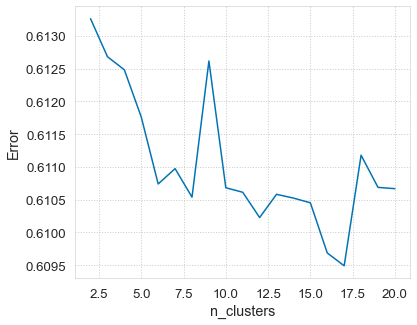

In [17]:
%%time
fig, ax = plt.subplots(1,1,figsize=(6,5))
plotErrorAcrossNumberOfClusters(ax, X, 0.075, "PAM250", np.arange(2, 21), 200)

In [58]:
# %%time
# fig, ax = plt.subplots(1,1,figsize=(6,5))
# plotErrorAcrossWeights(ax, X, 0.1, [0, 0.1, 0.25, 0.5, 0.75, 1, 2], "PAM250", 10, 200)